# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
%%time
train = pd.read_csv('../input/avitocategory/train.csv')

CPU times: user 54.2 s, sys: 6.33 s, total: 1min
Wall time: 1min 33s


In [3]:
%%time
test = pd.read_csv('../input/avitocategory/test.csv')

CPU times: user 17.3 s, sys: 1.73 s, total: 19 s
Wall time: 29.9 s


In [4]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [5]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234042 entries, 0 to 4234041
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   title          object
 1   description    object
 2   Category_name  object
 3   Category       int64 
dtypes: int64(1), object(3)
memory usage: 129.2+ MB


In [7]:
train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [8]:
train = train.fillna("")

In [9]:
train.isna().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [ ]:
%%time
train['description'] = train['title'] + ' ' + train['description']

In [ ]:
train.drop(columns=['title'], axis=1, inplace=True)

In [10]:
train.rename(columns={'description': 'text'}, inplace=True)

In [11]:
train.head()

,title,text,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [12]:
train['Category'].value_counts().count()

50

In [13]:
import numpy as np

In [14]:
y = np.array(train['Category'].value_counts())
x = np.array(list(set(train['Category'])))

In [15]:
import matplotlib.pyplot as plt

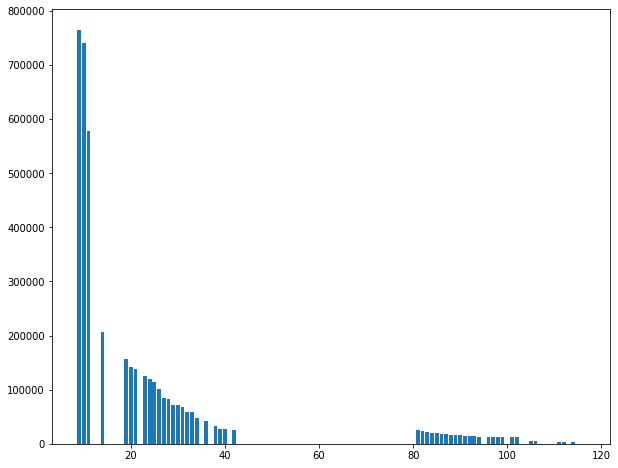

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
gr = ax.bar(x, y)
plt.show()

In [17]:
y_norm = y / np.sum(y)

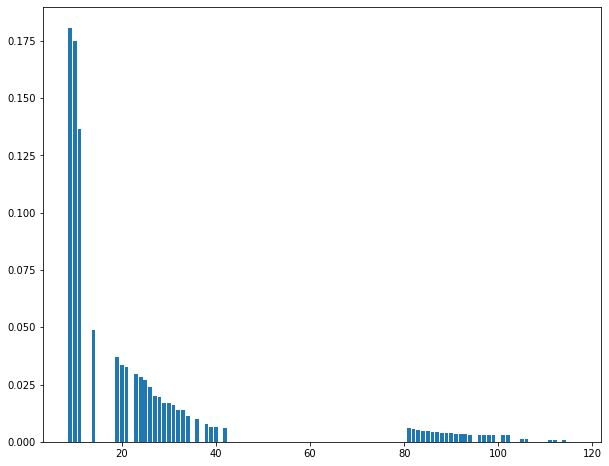

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
gr = ax.bar(x, y_norm.reshape(1, -1)[0])
plt.show()

In [19]:
ind_min = np.argmin(y_norm)
ind_max = np.argmax(y_norm)
print('Класс с наименьшей долей', float(y_norm[ind_min]),'-', x[ind_min])
print('Класс с наибольшей долей', float(y_norm[ind_max]),'-', x[ind_max])

Класс с наименьшей долей 3.8969854337769914e-05 - 116
Класс с наибольшей долей 0.1807067572782698 - 9


Первые три класса гораздо больше, чем все оставшиеся, в особенности больше, чем классы 80+, т.е. большой дисбаланс.

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
%%time
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train.text)

CPU times: user 4min 40s, sys: 5.8 s, total: 4min 46s
Wall time: 4min 46s


In [22]:
X.shape

(4234042, 2026081)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [23]:
%%time
voc = cnt_vec.vocabulary_

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


In [24]:
%%time
digit_first = [word for word in voc.keys() if word[0].isdigit()]
len(digit_first)

CPU times: user 248 ms, sys: 998 µs, total: 249 ms
Wall time: 248 ms


590943

In [25]:
%%time
punct_first = [word for word in voc.keys() if not word[0].isdigit() and not word[0].isalpha()]
len(punct_first)

CPU times: user 403 ms, sys: 1.97 ms, total: 405 ms
Wall time: 408 ms


2055

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числительные и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from string import punctuation

In [66]:
def tokenize(text):
    text = text.lower()
    noise = stopwords.words('russian') + list(punctuation)
    tokens = [SnowballStemmer('russian').stem(token) for token in word_tokenize(text) \
              if token.isalpha() and token not in noise]
    return tokens

In [28]:
tokenize(train.text[0])

['комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kango',
 'канг',
 'канг',
 'мега',
 'сценик',
 'lagun',
 'лагун',
 'cli',
 'кли',
 'nissa',
 'micr',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [67]:
%%time
sample = train.sample(100000)
cnt_vec = CountVectorizer(tokenizer=tokenize)
X = cnt_vec.fit_transform(sample.text)

CPU times: user 5min 18s, sys: 2.87 s, total: 5min 21s
Wall time: 5min 21s


In [30]:
X.shape

(100000, 77753)

In [31]:
from sklearn.model_selection import train_test_split

In [68]:
y = sample.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [69]:
%%time
clf = SGDClassifier()
clf.fit(X_train, y_train)

CPU times: user 19.2 s, sys: 11.4 s, total: 30.6 s
Wall time: 13 s


SGDClassifier()

In [35]:
print('accuracy = ',accuracy_score(y_test, clf.predict(X_test)))

accuracy =  0.75615


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
%%time
tfidf_vec = TfidfVectorizer(tokenizer=tokenize)
X = tfidf_vec.fit_transform(sample.text)

CPU times: user 5min 5s, sys: 2.9 s, total: 5min 8s
Wall time: 5min 8s


In [38]:
X.shape

(100000, 77753)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [40]:
print('accuracy = ',accuracy_score(y_test, clf.predict(X_test)))

accuracy =  0.7575


In [41]:
%%time
tfidf_vec = TfidfVectorizer(tokenizer=tokenize, max_df=0.9)
X = tfidf_vec.fit_transform(sample.text)

CPU times: user 5min 4s, sys: 2.78 s, total: 5min 7s
Wall time: 5min 7s


In [42]:
X.shape

(100000, 77753)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [44]:
print('accuracy = ',accuracy_score(y_test, clf.predict(X_test)))

accuracy =  0.75775


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [45]:
from sklearn.feature_extraction.text import HashingVectorizer

In [46]:
%%time
hash_vec = HashingVectorizer(tokenizer=tokenize, n_features=30000)
X = hash_vec.fit_transform(sample.text)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CPU times: user 5min 3s, sys: 2.75 s, total: 5min 6s
Wall time: 5min 6s


In [47]:
X.shape

(100000, 30000)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [49]:
print('accuracy = ',accuracy_score(y_test, clf.predict(X_test)))

accuracy =  0.7391


## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [50]:
%%time
test['description'] = test['title'] + ' ' + test['description']
test.drop(columns=['title'], axis=1, inplace=True)
test.rename(columns={'description': 'text'}, inplace=True)

CPU times: user 2.25 s, sys: 1.9 s, total: 4.15 s
Wall time: 4.14 s


In [51]:
test.isna().sum()

text      1
itemid    0
dtype: int64

In [52]:
test = test.fillna("")

In [ ]:
# %%time
# cnt_vec = CountVectorizer(tokenizer=tokenize)
# X_full = cnt_vec.fit_transform(train.text)

In [ ]:
# %%time
# tfidf_vec = TfidfVectorizer(tokenizer=tokenize)
# X_full = tfidf_vec.fit_transform(train.text)

In [ ]:
# %%time
# tfidf_vec_df = TfidfVectorizer(tokenizer=tokenize, max_df=0.9)
# X_full = tfidf_vec.fit_transform(train.text)

In [ ]:
# %%time
# hash_vec = HashingVectorizer(tokenizer=tokenize, n_features=30000)
# X_full = hash_vec.fit_transform(train.text)

In [ ]:
# %%time
# y_full = train.Category
# clf = SGDClassifier()
# clf.fit(X_full, y_full)

In [70]:
%%time
X_test_full = cnt_vec.transform(test.text)

CPU times: user 1h 20min 33s, sys: 44.4 s, total: 1h 21min 17s
Wall time: 1h 21min 19s


In [ ]:
# %%time
# X_test_full = tfidf_vec.transform(test.text)

In [ ]:
# %%time
# X_test_full = tfidf_vec_df.transform(test.text)

In [ ]:
# %%time
# X_test_full = hash_vec.transform(test.text)

In [ ]:
# %%time
# X_test_full = cnt_vec.transform(test.text)

In [61]:
X_test_full.shape

(1411348, 77753)

In [71]:
prediction = clf.predict(X_test_full)

In [72]:
output = pd.DataFrame({'Id': test.itemid, 'Category': prediction})

In [73]:
output.to_csv('submission.csv', index=False)